In [1]:
import math
import cmath
import numpy as np 
import matplotlib.pyplot as plt 

In [90]:
#define some mathematical constants 
sqrt = math.sqrt
s = sqrt(2)
e = cmath.exp
i = 1j 
pi = np.pi

In [3]:
#define kets and bras
ket_0 = np.array([1,0]) # |up>
ket_1 = np.array([0,1]) # |down>

In [4]:
def norm(v):
    norm = np.linalg.norm(v)
    return v/norm

In [5]:
#define optical components 
beam_splitter = [[1/s,i/s],[i/s,1/s]]

def phase_shifter(theta): 
    return [[1, 0], [0, e(i*theta)]]

def mzi(theta):
    right = np.matmul(phase_shifter(theta), beam_splitter)
    left = beam_splitter
    return np.matmul(left, right)

In [77]:
np.matmul(mzi(0), [1,1]).round(2)

array([0.+1.j, 0.+1.j])

In [6]:
def prob(function, theta, input):
    output = np.matmul(function(theta), input)
    output = norm(output)

    o1 = abs(output[0])**2
    o2 = abs(output[1])**2

    p1 = round(o1/(o1+o2), 2)
    p2 = round(o2/(o1+o2), 2)

    if len(input) == 3:
        o3 = abs(output[2])**2
        
        p1 = round(o1/(o1+o2+o3), 2)
        p2 = round(o2/(o1+o2+o3), 2)
        p3 = round(o3/(o1+o2+o3), 2)
        return p1, p2, p3 

    return p1, p2

In [7]:
phase = np.linspace(0, 4*pi, 100)

In [81]:
def func(x,a,b,c):
    return a*np.sin(b*x) + c

In [105]:
def plot_probs(function, input_state):
    det_1 = []
    det_2 = []
    for n in range(len(phase)):
        d1, d2 = prob(function, phase[n], input_state)
        det_1.append(d1)
        det_2.append(d2)

    d1_max = max(det_1)
    d2_max = max(det_2)

    plt.title(f'Probability Distribution for input state {input_state} and function: {function.__name__}')
    plt.xlabel('Phase (radians)')
    plt.ylabel('Probability')
    plt.ylim(-0.05,1.05)
    plt.scatter(phase, det_1, label='Detector 1')
    plt.scatter(phase, det_2, label='Detector 2')
    plt.legend(loc=1)
    plt.show()

    return d1_max, d2_max

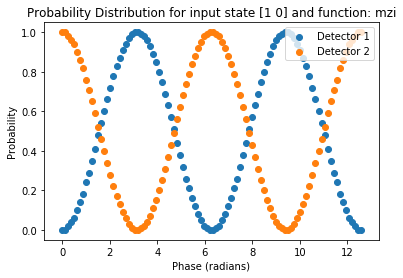

(1.0, 1.0)

In [108]:
#plot detector probabilities for single photon case 
plot_probs(mzi, ket_0)

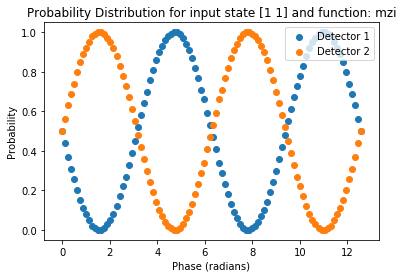

(1.0, 1.0)

In [107]:
#plot detector probabilities for two photon case 
two_photon = ket_0 + ket_1
plot_probs(mzi, two_photon)

In [55]:
#define optical component for loss 
loss = [[0.5,0],[0,1]]

In [56]:
def mzi_lossy(theta):
    right = np.matmul(loss, beam_splitter)
    left = np.matmul(beam_splitter, phase_shifter(theta))
    return np.matmul(left, right)

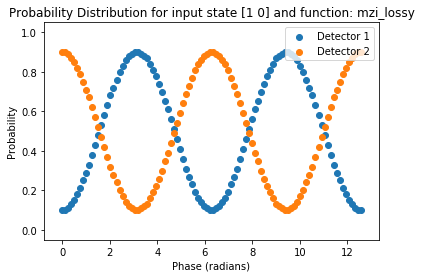

(0.9, 0.9)

In [109]:
#plot detector probabilities for single photon case in lossy circuit
plot_probs(mzi_lossy, ket_0)

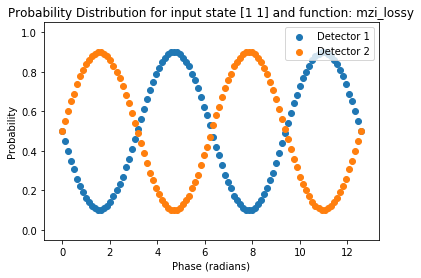

(0.9, 0.9)

In [110]:
#plot detector probabilities for two photon case in lossy circuit
plot_probs(mzi_lossy, two_photon)

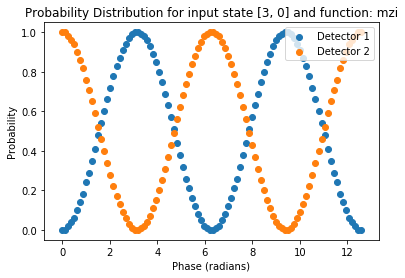

(1.0, 1.0)

In [111]:
three_photon = [3,0]
plot_probs(mzi, three_photon)